In [93]:
import pandas as pd
from sklearn import metrics
import math

In [94]:
%run ./DataGen2.ipynb

In [120]:
class Standard_Param():
    def __init__(self):
        # Region of interest :
        self.x_lim = [0, 4] # micrometer
        self.y_lim = [0, 4]

        # Clusters :
        self.NumberOfClusters = 40
        self.LocPerCluster    = [25] * self.NumberOfClusters
        self.r                = [30] * self.NumberOfClusters # nm
        self.cluster_shape    = 'uniform'

        # Noise :
        self.SNR              = 1
        self.UniformNoise     = True 
        
        # SMLM points : 
        self.mean_uncertainty      = 20
        self.dev_uncertainty       = 3
        self.N_photons             = 150
        
        # Scales : 
        self.NumberOfScales   = 1

In [121]:
def Call_DataGenerator(p):
    datagen = DataGenerator(x_lim = p.x_lim,
                        y_lim = p.y_lim,
                        NumberOfClusters = p.NumberOfClusters,
                        LocPerCluster = p.LocPerCluster,
                        r = p.r,
                        SNR = p.SNR,
                        NumberOfScales = p.NumberOfScales,
                        #delta = p.delta,
                        cluster_shape = p.cluster_shape,
                        UniformNoise = p.UniformNoise, 
                        mean_delta = p.mean_uncertainty, 
                        dev_delta = p.dev_uncertainty,
                        N_photons = p.N_photons)
    return datagen

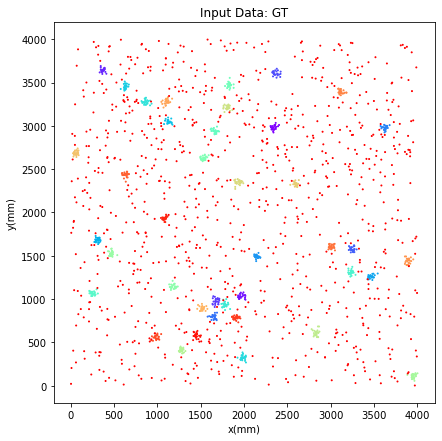

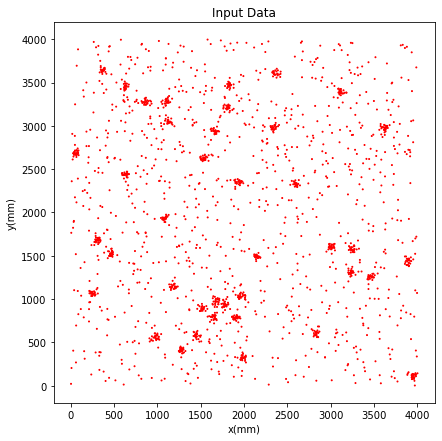

In [122]:
p = Standard_Param()
datagen = Call_DataGenerator(p)
datagen.plot_points()

In [123]:
df = datagen.GetAllData()

In [126]:
def calling_graphic(data, sigma_s = 30.0, noise_thresh = 0.5):
    P1 = data[['x', 'y']].to_numpy() # select the coordinates columns, and transform into a numpy object
    truelabels = data['labels_1'].to_numpy()

    Sigma1          = np.ones((P1.shape[0], 2, 2)) * (20)**2
    Sigma1[:, 0, 1] = 0
    Sigma1[:, 1, 0] = 0
    n1              = np.ones((P1.shape[0], 150)).ravel()

    density1, noise_points1, not_noise_points1, G0 = denoise(P1, Sigma1, sigma_s, noise_thresh, 1)
    labels1, G1, k1 = cluster_single_scale(P1, Sigma1, not_noise_points1, sigma_s, 1)
    plot_the_graph(G0, P1, 'Delaunay Graph', 1)
    plot_the_graph(G1, P1[not_noise_points1], 'Delaunay Graph', 1)
    labels1_fid     = labels1
    plot_points(P1, labels1, 'First scale - ' + str(k1) + ' clusters', 2)
    plot_clusters_with_graph(G1, P1[not_noise_points1], labels1_fid[not_noise_points1], '1st scale clusters with graph', 1)
    labels1_fid += 1 # to match the convention
    return labels1_fid


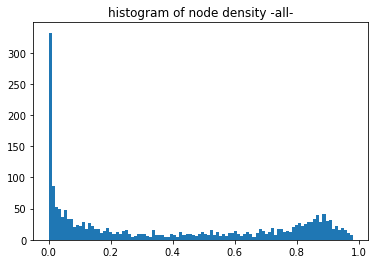

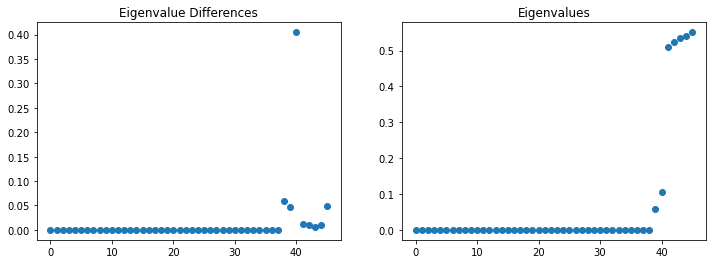

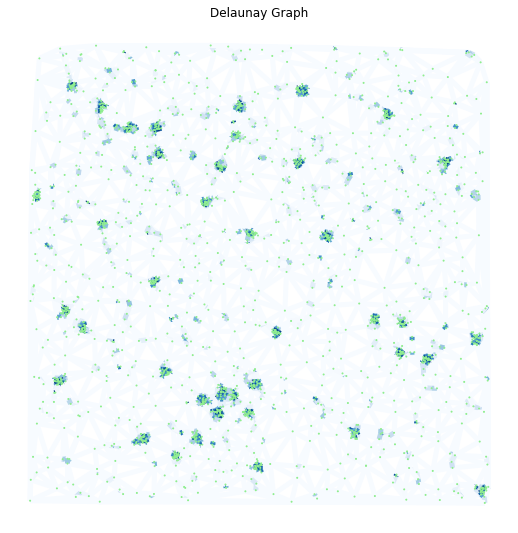

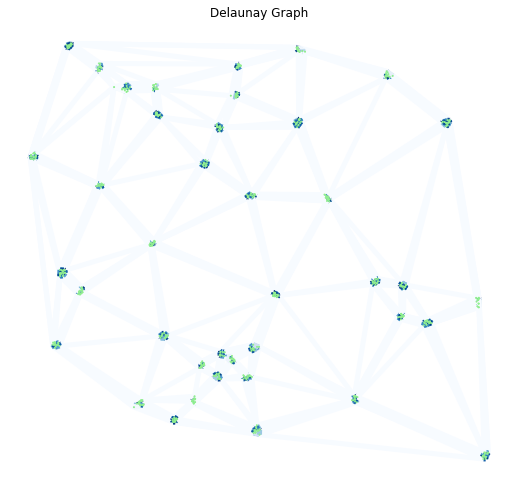

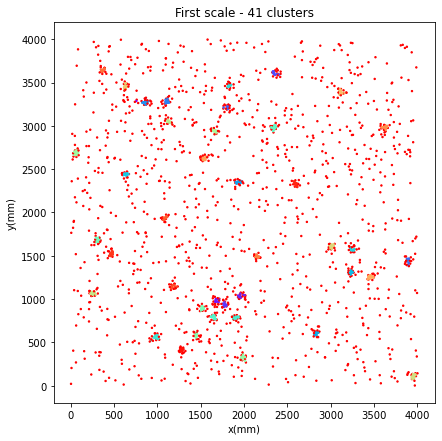

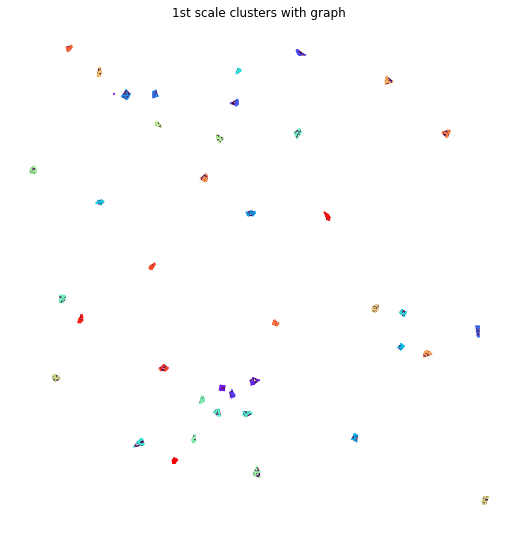

In [128]:
labs = calling_graphic(datagen.GetAllData(), sigma_s = 30, noise_thresh = 0.7)

In [31]:
def Generate_Standard(general_path, NumberOfSimulations = 30):
    print('in generate standard')
    
    # Load the standard parameters:
    p = Standard_Param()
    
    # Name of the last folder and of the first part of the csv file 
    name = 'simulated_SMLM_1'
    folder = 'standard'
    
    for i in range(NumberOfSimulations):
        if (i == 0): print(p.__dict__)
        datagen = Call_DataGenerator(p)
        datagen.save_to_csv(general_path + folder , name + '_' + str(i)) # saving a csv file at each iteration
    

def Generate_LowDensity(general_path, NumberOfSimulations = 30):
    print('in generate low density')
    # Load the standard parameters:
    p = Standard_Param()

    # Name of the last folder and of the first part of the csv file 
    name = 'simulated_SMLM_2'
    folder = 'low_density'
    
    # Changing some of the paramters: (LocPerCluster in this case)
    p.LocPerCluster    = [12] * p.NumberOfClusters
    
    for i in range(NumberOfSimulations):
        if (i == 0): print(p.__dict__)
        datagen = Call_DataGenerator(p)
        datagen.save_to_csv(general_path + folder , name + '_' + str(i)) # saving a csv file at each iteration
    
def Generate_HighNoise(general_path, NumberOfSimulations = 30):
    print('in generate high noise')
    # Load the standard parameters:
    p = Standard_Param()

    # Name of the last folder and of the first part of the csv file 
    name = 'simulated_SMLM_3'
    folder = 'high_noise'
    
    # Changing some of the paramters: (LocPerCluster in this case)
    p.SNR    = 0.5
    
    for i in range(NumberOfSimulations):
        if (i == 0): print(p.__dict__)
        datagen = Call_DataGenerator(p)
        datagen.save_to_csv(general_path + folder , name + '_' + str(i)) # saving a csv file at each iteration

def Generate_DifferentDensities(general_path, NumberOfSimulations = 30):
    print('in generate different densities')
    # Load the standard parameters:
    p = Standard_Param()

    # Name of the last folder and of the first part of the csv file 
    name = 'simulated_SMLM_4'
    folder = 'different_densities'
    
    # Changing some of the paramters: (LocPerCluster in this case)
    mean_loc         = 25
    dev              = 15

    for i in range(NumberOfSimulations):
        p.LocPerCluster   = np.random.uniform(low = mean_loc - dev, high = mean_loc + dev,
                                        size = (p.NumberOfClusters, 1))

        p.LocPerCluster  = [int(n) for n in p.LocPerCluster]
        if (i == 0): print(p.__dict__)
        datagen = Call_DataGenerator(p)
        datagen.save_to_csv(general_path + folder , name + '_' + str(i)) # saving a csv file at each iteration
        
        
def Generate_DifferentSizes(general_path, NumberOfSimulations = 30):
    print('in generate different sizes')
    # Load the standard parameters:
    p = Standard_Param()

    # Name of the last folder and of the first part of the csv file 
    name = 'simulated_SMLM_5'
    folder = 'different_sizes'
    
    # Changing some of the paramters: (The radii and the number of localizations per cluster)
    mean_r           = p.r[0]
    dev_r            = 15
    density          = p.LocPerCluster[0]/(math.pi * mean_r**2)

    for i in range(NumberOfSimulations):
        p.r   = np.random.uniform(low = mean_r - dev_r, high = mean_r + dev_r,
                                        size = p.NumberOfClusters)
        if (i == 0): print(p.__dict__)
        datagen = Call_DataGenerator(p)
        datagen.save_to_csv(general_path + folder , name + '_' + str(i)) # saving a csv file at each iteration
        
        
        
def Generate_NonUniformNoise(general_path, NumberOfSimulations = 30):
    print('in generate different sizes')
    # Load the standard parameters:
    p = Standard_Param()

    # Name of the last folder and of the first part of the csv file 
    name = 'simulated_SMLM_6'
    folder = 'non_uniform_noise'

    
    # Changing some of the paramters: (In this case: non-uniform noise)
    p.UniformNoise = False
    
    for i in range(NumberOfSimulations):
        if (i == 0): print(p.__dict__)
        datagen = Call_DataGenerator(p)
        datagen.save_to_csv(general_path + folder , name + '_' + str(i)) # saving a csv file at each iteration

        
def Generate_Elongated(general_path, NumberOfSimulations = 30):
    print('in generate elongated')
    
    # Load the standard parameters:
    p = Standard_Param()
    
    # Name of the last folder and of the first part of the csv file 
    name = 'simulated_SMLM_7'
    folder = 'elongated'

    for i in range(NumberOfSimulations):
        if (i == 0): print(p.__dict__)
        datagen = Call_DataGenerator(p)
        datagen.save_to_csv(general_path + folder , name + '_' + str(i)) # saving a csv file at each iteration

In [32]:
general_path = '/Users/Eliana/Documents/PDM/tests/'

In [33]:
Generate_DifferentDensities(general_path, 30)
Generate_DifferentSizes(general_path, 30)
Generate_NonUniformNoise(general_path, 30)

in generate different densities
{'x_lim': [0, 4], 'y_lim': [0, 4], 'NumberOfClusters': 40, 'LocPerCluster': [24, 17, 34, 31, 19, 27, 18, 32, 32, 30, 12, 13, 30, 37, 15, 27, 12, 35, 14, 18, 17, 13, 26, 34, 39, 37, 22, 24, 30, 16, 39, 27, 30, 30, 37, 33, 26, 24, 27, 26], 'r': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30], 'delta': 20, 'cluster_shape': 'uniform', 'SNR': 1, 'UniformNoise': True, 'NumberOfScales': 1}
in generate different sizes
{'x_lim': [0, 4], 'y_lim': [0, 4], 'NumberOfClusters': 40, 'LocPerCluster': [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25], 'r': array([18.50490305, 27.47758015, 16.116111  , 35.90719352, 18.58578758,
       31.39248109, 30.24868715, 27.4408496 , 34.1580921 , 16.30588888,
       22.10907784, 20.76785712, 23.4526502 , 17.89799

In [34]:
Generate_Standard(general_path, 30)
Generate_HighNoise(general_path, 30)
Generate_LowDensity(general_path, 30)

in generate standard
{'x_lim': [0, 4], 'y_lim': [0, 4], 'NumberOfClusters': 40, 'LocPerCluster': [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25], 'r': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30], 'delta': 20, 'cluster_shape': 'uniform', 'SNR': 1, 'UniformNoise': True, 'NumberOfScales': 1}
in generate high noise
{'x_lim': [0, 4], 'y_lim': [0, 4], 'NumberOfClusters': 40, 'LocPerCluster': [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25], 'r': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30], 'delta': 20, 'cluster_shape': 'uniform', 'SNR': 0.5,

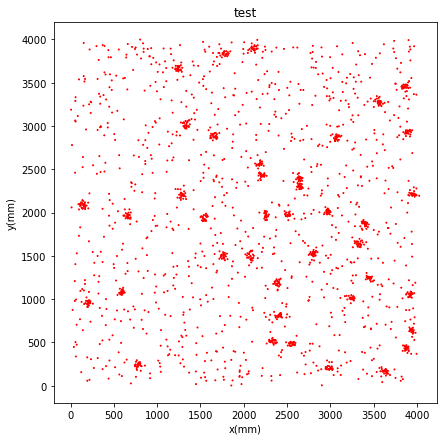

In [36]:
dat = pd.read_csv('/Users/Eliana/Documents/PDM/tests/standard/simulated_SMLM_1_0.csv')
plot_points(dat[['x', 'y']].to_numpy(), [0] * len(dat['labels_1'].to_numpy()), 'test', 1)

In [49]:
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
LocPerCluster    = [25] * NumberOfClusters
r                = [30] * NumberOfClusters # nm
SNR              = 0.70
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

# Many simulations:
NumberOfSimulations = 30

name = 'simulated_SMLM_3'
folder = 'high_noise'

for i in range(NumberOfSimulations):
    datagen = DataGenerator(x_lim = x_lim,
                            y_lim = y_lim,
                            NumberOfClusters = NumberOfClusters,
                            LocPerCluster = LocPerCluster,
                            r = r,
                            SNR = SNR,
                            NumberOfScales = NumberOfScales,
                            delta = delta, cluster_shape = cluster_shape) 
    
    datagen.save_to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/' + folder , name + '_' + str(i))

In [14]:
# ----- Clusters of different sizes --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_r           = 30
dev_r            = 20
density          = 25/(math.pi * mean_r**2)

r               = np.random.uniform(low = mean_r - dev_r, high = mean_r + dev_r,
                                    size = NumberOfClusters)



LocPerCluster   = [int(math.pi * rad **2  * density + 0.5) for rad in r]


SNR              = 0.70
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

In [26]:
# ----- Clusters of different densities --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_density     = 25
dev              = 15
r                = [30] * NumberOfClusters # nm

SNR              = 0.70 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

# Many simulations:
NumberOfSimulations = 30

name = 'simulated_SMLM_4'
folder = 'different_densities'

for i in range(NumberOfSimulations):
    LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                    size = (NumberOfClusters, 1))

    LocPerCluster  = [int(n) for n in LocPerCluster]
    
    datagen = DataGenerator(x_lim = x_lim,
                            y_lim = y_lim,
                            NumberOfClusters = NumberOfClusters,
                            LocPerCluster = LocPerCluster,
                            r = r,
                            SNR = SNR,
                            NumberOfScales = NumberOfScales,
                            delta = delta, cluster_shape = cluster_shape) 
    
    datagen.save_to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/' + folder , name + '_' + str(i))


In [112]:
'''
# clusters with different densities. Average density = 25 loc/clusters. 
mean_density = 25
dev = 15
LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                    size = (NumberOfClusters - 1 , 1))
LocPerCluster  = [int(n) for n in LocPerCluster]
last_density = mean_density * NumberOfClusters - np.sum(LocPerCluster)
last_density = int(last_density)
print('last_density:', last_density)
LocPerCluster = np.append(LocPerCluster, last_density)
print(np.mean(LocPerCluster))
'''
# For clusters with different densities. 
mean_density = 25
dev = 15
LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                    size = (NumberOfClusters, 1))

LocPerCluster  = [int(n) for n in LocPerCluster]


SyntaxError: invalid syntax (<ipython-input-112-112f81042516>, line 20)

In [114]:
r[:,0]

array([37.22146712, 27.28876398, 16.67419661, 42.59214037, 36.97807084,
       12.38365565, 17.12709622, 39.08223359, 40.57002931, 49.58899606,
       40.86901415, 33.63754816, 48.96807588, 30.93838917, 35.43705418,
       22.38405493, 40.91525995, 29.18589977, 45.95152785, 43.64724046,
       15.91346461, 49.5799197 , 38.59166261, 37.26084997, 10.88383502,
       40.39664963, 21.60587047, 23.05964823, 34.03981297, 46.86545566,
       30.23028855, 35.05901201, 15.54207032, 17.9205686 , 34.21801901,
       29.64590795, 28.94758962, 42.89293717, 44.59920819, 46.16905176])

In [67]:
np.mean(LocPerCluster)

23.85

In [69]:
name = 'simulated_SMLM_4'
comment = 'clusters of different densities. The mean density is the standard denstity.'

In [65]:
datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        SNR = 0.25,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape) 

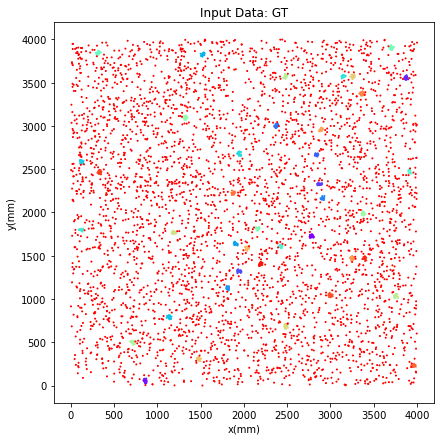

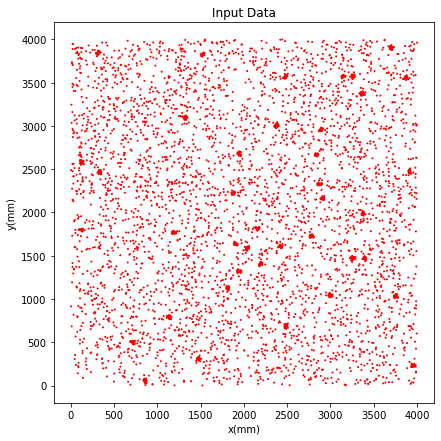

In [66]:
datagen2.plot_points(dot_size = 1)

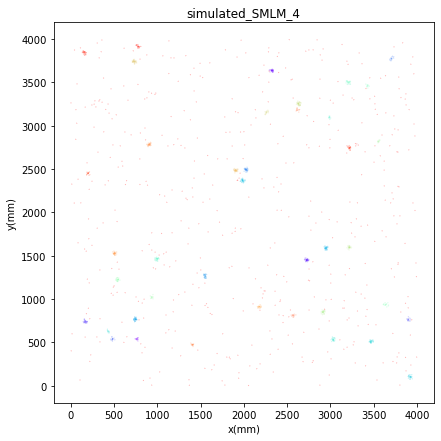

In [72]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)


In [73]:
dict_parameters = {'x_lim': x_lim , 'y_lim': y_lim, 'NumberOfClusters': NumberOfClusters, 
                  'LocPerCluster': LocPerCluster, 'r': r , 'SNR': SNR, 
                  'delta': delta, 'NumberOfScales': NumberOfScales,
                  'cluster_shape' : cluster_shape}

In [74]:
with open('/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'+ name + '_param.txt', 'w') as f:
    print(dict_parameters, file=f)
    print('# ' + comment, file = f)

In [75]:
datagen2.save_to_csv('/Users/Eliana/Documents/PDM/Codes/My_codes/Data', name)

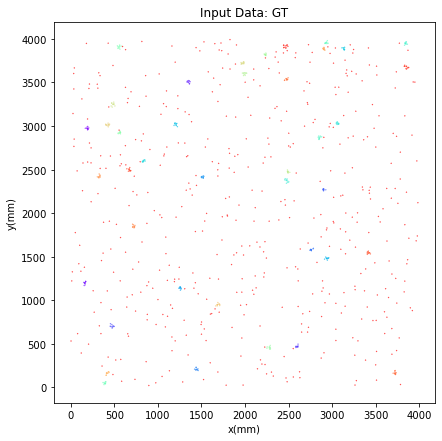

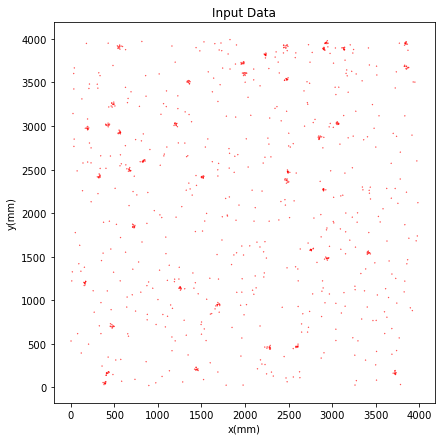

In [26]:
datagen2.plot_points(dot_size = 0.1)

Voir si on peut dessiner et sauver la figure après coup, après avoir généré et sauver les points en csv: C'est bon ça marche en mettant en numpy.

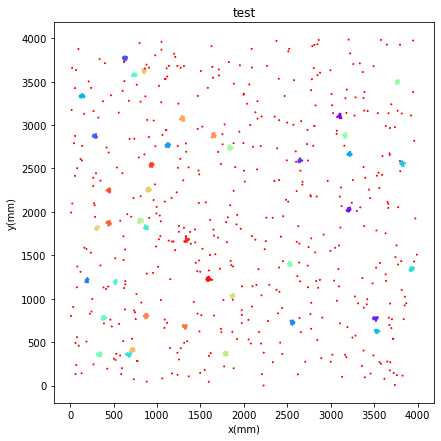

In [17]:
plot_points(dat[['x', 'y']].to_numpy(), dat['labels_1'].to_numpy(), 'test', 1)

# Sauver les figures. 5 mai, pour meeting

In [38]:
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
LocPerCluster    = [25] * NumberOfClusters
r                = [30] * NumberOfClusters # nm
SNR              = 0.25 # absolute number 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1


name = 'simulated_SMLM_4'

datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        SNR = SNR,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape)


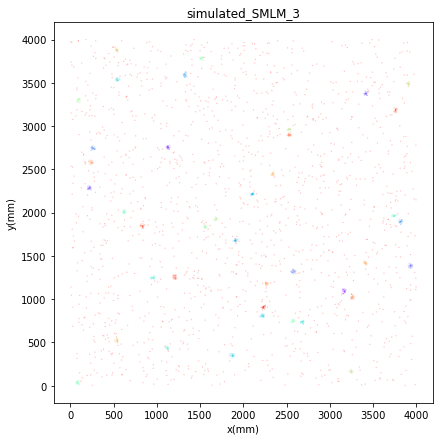

In [39]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)

In [42]:
# ----- Clusters of different densities --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_density     = 25
dev              = 15
r                = [30] * NumberOfClusters # nm

IsolatedLoc      = 500 # absolute number 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1

# Many simulations:
NumberOfSimulations = 30

name = 'simulated_SMLM_4'

LocPerCluster   = np.random.uniform(low = mean_density - dev, high = mean_density + dev,
                                size = (NumberOfClusters, 1))

LocPerCluster  = [int(n) for n in LocPerCluster]

datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        IsolatedLoc = IsolatedLoc,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape) 
    

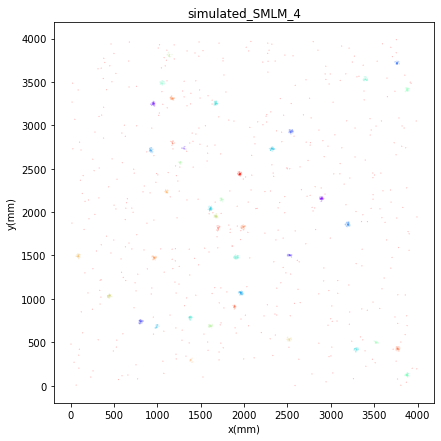

In [43]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)

In [44]:
# ----- Clusters of different sizes --------
    
# Region of interest :
x_lim = [0, 4] # micrometer
y_lim = [0, 4]

# Clusters :
NumberOfClusters = 40
mean_r           = 30
dev_r            = 20
density          = 25/(math.pi * mean_r**2)

r               = np.random.uniform(low = mean_r - dev_r, high = mean_r + dev_r,
                                    size = NumberOfClusters)



LocPerCluster   = [int(math.pi * rad **2  * density + 0.5) for rad in r]


IsolatedLoc      = 500 # absolute number 
delta            = 1 #nm
cluster_shape    = 'uniform'

NumberOfScales   = 1



name = 'simulated_SMLM_5'


datagen2 = DataGenerator(x_lim = x_lim,
                        y_lim = y_lim,
                        NumberOfClusters = NumberOfClusters,
                        LocPerCluster = LocPerCluster,
                        r = r,
                        IsolatedLoc = IsolatedLoc,
                        NumberOfScales = NumberOfScales,
                        delta = delta, cluster_shape = cluster_shape) 
    

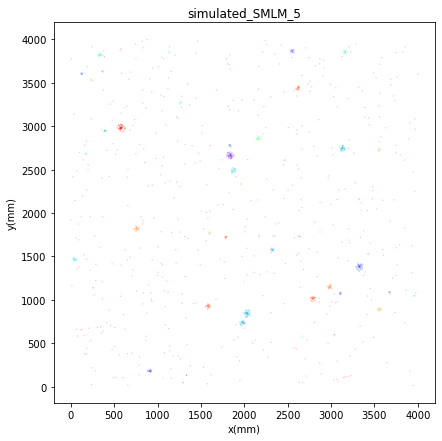

In [45]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/figures/'

datagen2.save_fig_pdf(path, name, dot_size = 0.01)

In [90]:
a = np.array([[5, 6], [7, 8]])
b = np.array([[5, 5], [5, 5]])
df = pd.DataFrame({"a": [a,b]})

In [91]:
df

,a
0,"[[5, 6], [7, 8]]"
1,"[[5, 5], [5, 5]]"


In [116]:
Sigma        = np.ones((5, 2, 2)) * 0.5

In [117]:
Sigma

array([[[0.5, 0.5],
        [0.5, 0.5]],

       [[0.5, 0.5],
        [0.5, 0.5]],

       [[0.5, 0.5],
        [0.5, 0.5]],

       [[0.5, 0.5],
        [0.5, 0.5]],

       [[0.5, 0.5],
        [0.5, 0.5]]])